In [42]:
import time
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = 10, 10
import numpy as np
np.random.seed(2017) # set random seed value to get reproducible results
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.base import clone

In [43]:
# store start time to get execution time of entire script
start_time = time.time()

In [44]:
def forward_feature_selection(model, X, y):
    features = list(X.columns)
    selected_features = []
    scores = []
    
    for i in tqdm(range(X.shape[1])):
        best_score = 0
        next_feat = ''
        for feat in features:
            selected_features.append(feat)
            temp_X = X[selected_features]
            temp_scores = cross_validate(clone(model), temp_X, y, cv=5, scoring='recall')
            temp_score = temp_scores['test_score'].mean()
            if temp_score > best_score:
                best_score = temp_score
                next_feat = feat
            selected_features.pop()
        #print('Added Feature:', next_feat)
        selected_features.append(next_feat)
        features.remove(next_feat)
        scores.append(best_score)
        
    print('Ordering of Features:', selected_features)
    
    plt.title('Forward Feature Selection')
    plt.xlabel('# of Features')
    plt.ylabel('score')
    plt.plot(list(range(X.shape[1])), scores)

In [45]:
def backward_feature_selection(rsf, X, y):
    features = list(X.columns)
    removed_features = []
    scores = []
    
    # calculate scores with all features
    temp_scores = cross_validate(model, X, y, cv=5)
    temp_score = temp_scores['test_score'].mean()
    scores.append(temp_score)
    
    for i in tqdm(range(X.shape[1]-1)):
        best_score = 0
        drop_feat = ''
        for feat in features:
            removed_features.append(feat)
            temp_X = X.drop(columns=removed_features, inplace=False)
            temp_scores = cross_validate(clone(model), temp_X, y, cv=5, scoring='recall')
            temp_score = temp_scores['test_recall'].mean()
            if temp_score > best_score:
                best_score = temp_score
                drop_feat = feat
            removed_features.pop()
        #print('Removed Feature:', next_feat)
        removed_features.append(drop_feat)
        features.remove(drop_feat)
        scores.append(best_score)
    
    removed_features.extend(features) # add last element left in features
    removed_features.reverse()
    print('Ordering of Features:', removed_features)
    
    plt.title('Backward Feature Selection')
    plt.xlabel('# of Features')
    plt.ylabel('score')
    
    x = list(range(X.shape[1]))
    x.reverse()
    plt.plot(x, scores)

In [46]:
# CONTROLS

#model = RandomForestClassifier()
model = xgb.XGBClassifier(eval_metric='error', use_label_encoder=False)

outcome = 'harmfuldrink'
#outcome = 'alc_postlt

In [47]:
df = pd.read_csv('data_final.csv', index_col=0)
print(df.shape)
df.head()

(123, 184)


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q20,q21,q22,q23,q24,q25,q26,q27,q28,q30,q31,q32,q33,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q63,q64,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,q82,q83,q84,q85,q86,q88,q89,q91,q93,q94,q95,q96,q97,q98,q99,q100,q102,q103,q104,q106,q107,q108,q109,q110,q111,q112,q113,q114,q115,q116,q117,q118,q119,q120,q121,q122,q123,q124,q127,q128,q129,q130,q132,q133,q134,q135,q136,q137,q138,q139,q140,q141,q142,q143,q145,q146,q147,q148,q149,q150,q151,q152,q153,q154,q155,q156,q157,q158,q159,q160,q161,q162,q163,q164,q165,q166,q168,q169,q171,q172,q173,q174,q175,q176,q177,q178,q179,q180,q181,q182,q183,q184,q185,q186,q187,q188,q189,q190,q191,q192,q193,q194,q196,q197,q198,q199,harmfuldrink,center
0,7,2,1,1,1,0,0,0,0,1,NaN,NaN,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,0,NaN,0,NaN,NaN,NaN,0,0.0,NaN,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,36.0,8.0,8.0,0.0,0.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,1.0,NaN,0.0,NaN,NaN,0,1,4.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1,1.0,NaN,0.0,NaN,NaN,2.0,0,0,0.0,1.0
1,7,2,1,1,1,0,0,0,0,1,NaN,NaN,2,NaN,0.0,2.0,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0,0,NaN,60.0,NaN,2.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,0,0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,3,1.0,NaN,NaN,1.0,NaN,NaN,0,0,0.0,1.0
2,5,2,0,1,1,0,0,0,0,1,NaN,NaN,1,NaN,0.0,2.0,NaN,NaN,0.0,0.0,0,NaN,NaN,0.0,0,NaN,2,NaN,0.0,NaN,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,7.0,8.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1,0,NaN,NaN,0.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,0,0,5.0,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1,1.0,NaN,0.0,NaN,NaN,NaN,0,0,0.0,1.0
3,8,2,1,0,1,0,0,0,0,1,NaN,NaN,2,1.0,1.0,2.0,NaN,NaN,0.0,0.0,0,1.0,NaN,0.0,0,NaN,2,NaN,NaN,NaN,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,1.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,1,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,NaN,1.0,2,1.0,NaN,NaN,1.0,NaN,NaN,1,0,1.0,1.0
4,13,2,1,1,1,0,0,0,1,1,NaN,NaN,2,1.0,0.0,2.0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,0,NaN,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,18.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,12.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,N

In [48]:
df['harmfuldrink'].value_counts()

0.0    96
1.0    27
Name: harmfuldrink, dtype: int64

In [49]:
X = df.drop(columns=[outcome]) # extract predictors
y = df[outcome] # extract outcome

In [50]:
# # imput missing data with mode of column
# for col in X.columns:
#     X[col].fillna(X[col].mode()[0], inplace=True)
# X.head()


Ordering of Features: ['q178', 'q188', 'q69', 'q26', 'q134', 'q180', 'q181', 'q6', 'q7', 'q10', 'q71', 'q130', 'q171', 'q198', 'q8', 'q199', 'q177', 'q179', 'q32', 'q46', 'q174', 'q146', 'q145', 'q118', 'q11', 'q12', 'q85', 'q138', 'q123', 'q98', 'q67', 'q135', 'q17', 'q60', 'q159', 'q30', 'q155', 'q43', 'q18', 'q31', 'q97', 'q187', 'q61', 'q24', 'q9', 'q96', 'q156', 'q158', 'q121', 'q40', 'q132', 'q175', 'q82', 'q3', 'q161', 'q124', 'q116', 'q5', 'q22', 'q122', 'q49', 'q4', 'q196', 'q173', 'q184', 'q103', 'q2', 'q142', 'q38', 'q57', 'q102', 'q137', 'q143', 'q136', 'q47', 'q166', 'q14', 'q191', 'q68', 'q129', 'q192', 'q114', 'q140', 'q197', 'q64', 'q100', 'q55', 'q84', 'q127', 'q35', 'q93', 'q99', 'q176', 'q25', 'q63', 'q58', 'q139', 'q27', 'q193', 'q112', 'q168', 'q39', 'q65', 'q147', 'q50', 'q108', 'q111', 'q16', 'q59', 'q194', 'q110', 'q41', 'q141', 'q28', 'q53', 'q94', 'q185', 'q83', 'q20', 'q1', 'q172', 'q153', 'q37', 'q157', 'q77', 'q21', 'q13', 'q163', 'q76', 'q23', 'q88', 'q54

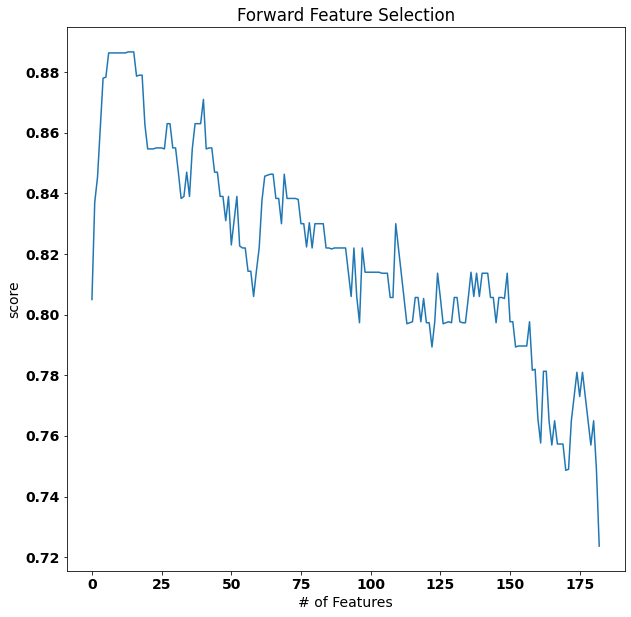

In [51]:
forward_feature_selection(model, X, y)


Ordering of Features: ['q133', 'q78', 'q189', 'q178', 'q51', 'q66', 'q165', 'q80', 'q162', 'q52', 'q74', 'q115', 'q104', 'q190', 'q149', 'q73', 'q128', 'q148', 'q56', 'q72', 'q151', 'q37', 'q113', 'q50', 'q95', 'q146', 'q59', 'q86', 'q155', 'q139', 'q79', 'q106', 'q121', 'q186', 'q15', 'q38', 'q196', 'q49', 'q122', 'q24', 'q185', 'q94', 'q156', 'q172', 'q127', 'q44', 'q76', 'q124', 'q123', 'q64', 'q16', 'q160', 'center', 'q36', 'q25', 'q2', 'q1', 'q100', 'q183', 'q9', 'q188', 'q197', 'q182', 'q179', 'q177', 'q168', 'q150', 'q89', 'q33', 'q191', 'q187', 'q120', 'q88', 'q169', 'q71', 'q163', 'q161', 'q119', 'q199', 'q198', 'q153', 'q194', 'q193', 'q192', 'q184', 'q181', 'q180', 'q176', 'q175', 'q174', 'q173', 'q171', 'q166', 'q159', 'q158', 'q141', 'q75', 'q41', 'q102', 'q134', 'q3', 'q82', 'q157', 'q164', 'q84', 'q4', 'q81', 'q77', 'q53', 'q154', 'q145', 'q143', 'q142', 'q140', 'q138', 'q137', 'q136', 'q135', 'q132', 'q130', 'q129', 'q116', 'q28', 'q111', 'q107', 'q58', 'q14', 'q117', 

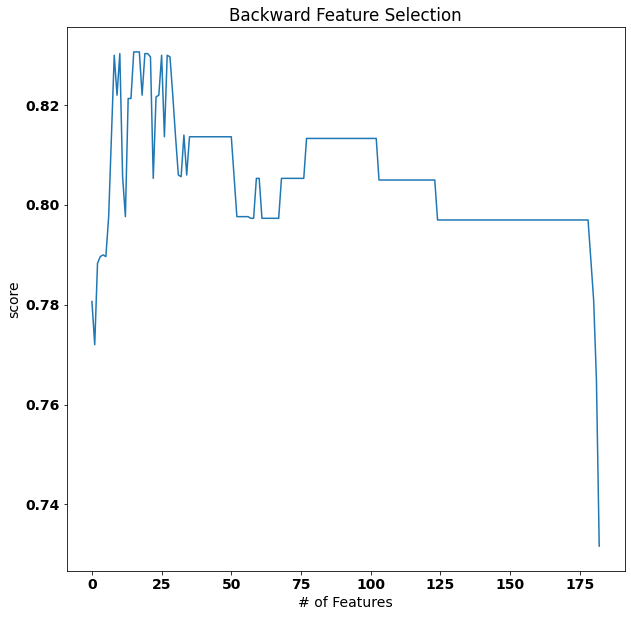

In [52]:
backward_feature_selection(model, X, y)